In [2]:
from train import *

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Current device:", device)

Current device: cuda


In [4]:
def lhs(size, lb=-1, rb=1):
    res = np.zeros(size)
    length = (rb - lb) / size
    for i in range(size):
        sub_lb = lb + length * i
        sub_rb = lb + length * (i + 1)
        res[i] = np.random.rand() * length + sub_lb
    return res
        

In [116]:
epochs = 1000
lr = 0.01

alpha = np.random.uniform(low=0.005/np.pi, high=0.1/np.pi, size=10000)
print(alpha)
# alpha = np.random.uniform(low=-1, high=1, size=100)
# beta = np.random.uniform(low=-1, high=1, size=100)
# alpha = -0.689
# beta = -0.680
# print("Alpha: {:.3f}, Beta: {:.3f}".format(alpha, beta))
# print(alpha)
# print(beta)
# loss_i, loss_b, loss_f, loss, model, val_loss, val_ood_loss, nrmse = train(epochs=epochs, lr=lr, i_size=0, b_size=2, f_size=1000, zero_shot=False, alpha_list=-0.689, beta_list=-0.680, low=-1, high=1, eqname='poisson')
# loss_i, loss_b, loss_f, loss, model, val_loss, val_ood_loss, nrmse = train(epochs=epochs, lr=lr, i_size=0, b_size=2, f_size=1, zero_shot=True, alpha_list=alpha, beta_list=beta, low=-1, high=1, eqname='poisson', load=False, load_data='models/poisson_zs_8000.data')
loss_i, loss_b, loss_f, loss, model, val_loss, val_ood_loss, nrmse = train(epochs=epochs, lr=lr, i_size=1, b_size=2, f_size=1, zero_shot=True, alpha_list=alpha, low=-1, high=1, eqname='burgers')
# loss_i, loss_b, loss_f, loss, model, val_loss, val_ood_loss, nrmse = train(epochs=epochs, lr=lr, i_size=100, b_size=100, f_size=10000, zero_shot=False, alpha_list=(0.01 / np.pi), low=-1, high=1, eqname='burgers')

[0.00518525 0.01716001 0.01000793 ... 0.00263647 0.00709221 0.00360896]
Current device: cuda
Data generation completed
Epoch 100 | Loss_I: 0.1456 | Loss_B: 0.0286 | Loss_F: 0.0354
alpha: [0.003183098861837907], Val. NRMSE: 0.657 
alpha: [0.06366197723675814], Val. OOD NRMSE: 0.356 
Epoch 200 | Loss_I: 0.0903 | Loss_B: 0.0165 | Loss_F: 0.0339
alpha: [0.003183098861837907], Val. NRMSE: 0.406 
alpha: [0.06366197723675814], Val. OOD NRMSE: 0.282 
Epoch 300 | Loss_I: 0.0707 | Loss_B: 0.0119 | Loss_F: 0.0323
alpha: [0.003183098861837907], Val. NRMSE: 0.528 
alpha: [0.06366197723675814], Val. OOD NRMSE: 0.305 
Epoch 400 | Loss_I: 0.0600 | Loss_B: 0.0096 | Loss_F: 0.0308
alpha: [0.003183098861837907], Val. NRMSE: 0.217 
alpha: [0.06366197723675814], Val. OOD NRMSE: 0.257 
Epoch 500 | Loss_I: 0.0490 | Loss_B: 0.0079 | Loss_F: 0.0264
alpha: [0.003183098861837907], Val. NRMSE: 0.141 
alpha: [0.06366197723675814], Val. OOD NRMSE: 0.290 
Epoch 600 | Loss_I: 0.0412 | Loss_B: 0.0067 | Loss_F: 0.0230


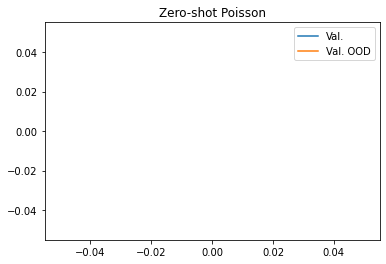

In [8]:
# epochs = [50 * i for i in range(1, 21)]
plt.plot(val_loss, label='Val.')
plt.plot(val_ood_loss, label='Val. OOD')
# plt.yscale('log')
plt.title("Zero-shot Poisson")
plt.legend()
plt.show()

In [ ]:
import pandas as pd

In [ ]:
val_loss_lst = []
val_ood_loss_lst = []
for v in val_loss:
    val_loss_lst.append(v.item())
for v in val_ood_loss:
    val_ood_loss_lst.append(v.item())
len(loss_f)
dic = {"loss_b": loss_b, "loss_f": loss_f, "loss": loss}
df = pd.DataFrame(dic)
df.to_csv("poisson_zs_loss.csv")
dic = {"val_loss": val_loss_lst, "val_ood_loss": val_ood_loss_lst}
df = pd.DataFrame(dic)
df.to_csv("poisson_zs_val.csv")

In [ ]:
np.savez('zs_burgers', loss_i=np.array(loss_i), loss_b=np.array(loss_b), loss_f=np.array(loss_f), loss=np.array(loss), val_loss=np.array(val_loss), val_ood_loss=np.array(val_ood_loss), nrmse=np.array(nrmse))
aa=np.load('zs_burgers.npz')
# plt.plot(aa['loss_i'])
# plt.plot(aa['loss_b'])
# plt.plot(aa['loss_f'])
plt.plot(aa['val_loss'])
plt.plot(aa['val_ood_loss'], label='xx')
plt.yscale('log')
plt.legend()

In [7]:

model2 = PINN(20, 5, dim=1, param_num=2, zero_shot=True)
model2.load_state_dict(torch.load('models/poisson_zs_2000_ref.data'))
model2.to(device)

PINN(
  (module1): Sequential(
    (0): Linear(in_features=3, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=20, bias=True)
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [11]:
test_x = np.linspace(-1, 1, num=100).reshape(-1, 1)
# test_alpha = np.full((100, 1), alpha[2])
# test_beta = np.full((100, 1), beta[2])
alpha = -0.381
beta = 0.205
test_alpha = np.full((100, 1), alpha)
test_beta = np.full((100, 1), beta)
test_in = np.hstack((test_x, test_alpha, test_beta))
# test_in = test_x
test_u = model2(torch.Tensor(test_in).to(device))
X = test_x

Y = np.sin(test_alpha * X) + np.cos(test_beta * X) + 0.1 * X


In [12]:
test_x = np.linspace(-1, 1, num=100).reshape(-1, 1)
test_in = np.hstack((test_x, test_alpha, test_beta))
# test_in = test_x
test_u_2 = model2(torch.Tensor(test_in).to(device))

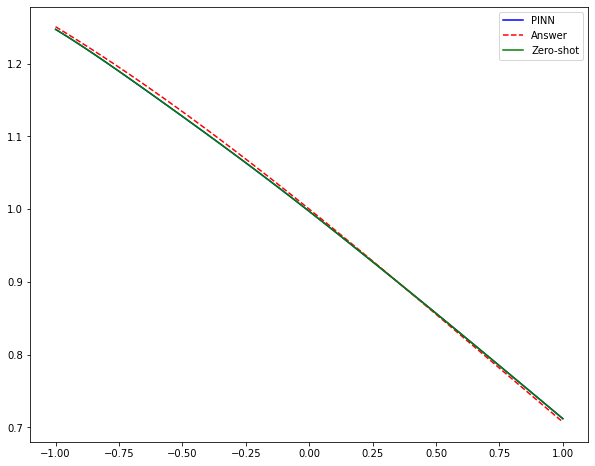

In [13]:
C = test_u.cpu().detach().numpy()
C2 = test_u_2.cpu().detach().numpy()
plt.figure(figsize=(10, 8))
plt.plot(X, C, 'b', label='PINN')
plt.plot(X, Y, 'r--', label='Answer')
plt.plot(X, C2, 'g', label='Zero-shot')
plt.legend()
# plt.colorbar()

In [14]:
np.sqrt(np.sum( (Y-C) ** 2) / np.sum( C ** 2 ))

0.00414956724752341

In [ ]:
from burgers import *

In [29]:

model = PINN(20, 8, dim=2, param_num=1, zero_shot=True)
model.load_state_dict(torch.load('models/burgers_zs_2000_ref.data'))
model.to(device)


PINN(
  (module1): Sequential(
    (0): Linear(in_features=3, out_features=20, bias=True)
    (1): Linear(in_features=20, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): Linear(in_features=20, out_features=20, bias=True)
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): Linear(in_features=20, out_features=20, bias=True)
    (6): Linear(in_features=20, out_features=20, bias=True)
    (7): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [50]:
vtn = 101
vxn = 101
nu = 0.01 / np.pi
vx = np.linspace(-1, 1, vxn)
vt = np.linspace(0, 1, vtn)
x, t = np.meshgrid(vx, vt)
x = x.reshape(-1, 1)
t = t.reshape(-1, 1)
alpha = np.full((x.shape), nu)
pred = model(torch.Tensor(np.hstack((x, t, alpha))).to(device)).detach().cpu().numpy()
# pred = model(torch.Tensor(np.hstack((x, t))).to(device)).detach().cpu().numpy()
truth = burgers_viscous_time_exact1(nu, vxn, vx, vtn, vt).T

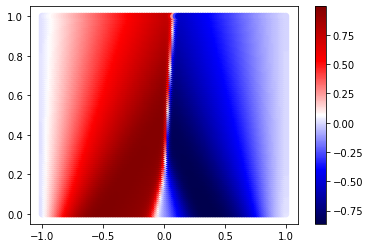

In [51]:
plt.scatter(x, t, c=pred, cmap='seismic')
plt.colorbar()

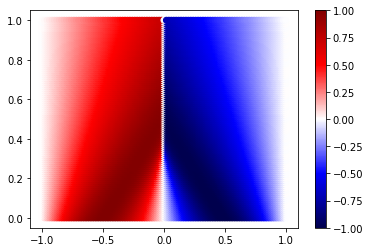

In [52]:
plt.scatter(x, t, c=truth, cmap='seismic')
plt.colorbar()

0.6


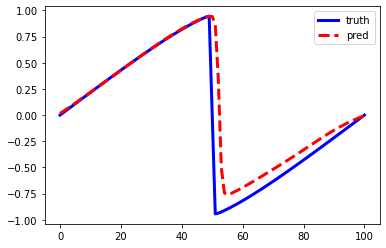

In [53]:
idx = 60
print(vt[idx])
plt.plot(truth[idx, :], 'b', linewidth=3, label='truth')
x_025 = np.linspace(-1, 1, 101).reshape(-1, 1)
t_025 = np.full((x_025.shape), idx / 100)
pred_ = model(torch.Tensor(np.hstack((x_025, t_025, np.full((x_025.shape), nu)))).to(device)).detach().cpu().numpy()
plt.plot(pred_, 'r--', linewidth=3, label='pred' )
plt.legend()

In [54]:
np.sqrt(np.sum((pred-truth.reshape(-1, 1)) ** 2) / np.sum(pred ** 2))

0.3871423057682573

In [55]:
np.mean(np.abs(pred-truth.reshape(-1, 1)))

0.09327991079195741

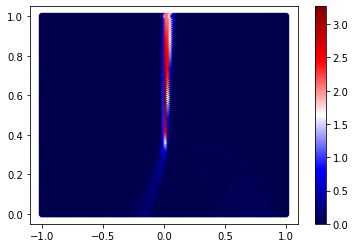

In [56]:
plt.scatter(x, t, c=((pred.reshape(101, 101) - truth) ** 2).reshape(-1, 1), cmap='seismic')
plt.colorbar()

In [64]:
from generate_data import *

In [110]:
support_data_f = make_training_domain_data_burgers(1000, alpha=np.mean(alpha), low=-1, high=1, zero_shot=True)

In [111]:
input_f, target_f = support_data_f

In [112]:
input_f = input_f.to(device)
target_f = target_f.to(device)

In [113]:
loss_f = model.calc_loss_f_burgers(input_f, target_f)

In [114]:
loss_f

tensor(0.0597, device='cuda:0', grad_fn=<MseLossBackward0>)